In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('/kaggle/input/bangalore-houses-price/bengaluru_house_prices.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [52]:
df.shape

(13320, 9)

In [53]:
df.duplicated().sum()

529

In [95]:
df = df.drop_duplicates()
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12791 entries, 0 to 13318
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     12791 non-null  object 
 1   availability  12791 non-null  object 
 2   location      12790 non-null  object 
 3   size          12775 non-null  object 
 4   society       7463 non-null   object 
 5   total_sqft    12791 non-null  object 
 6   bath          12718 non-null  float64
 7   balcony       12186 non-null  float64
 8   price         12791 non-null  float64
dtypes: float64(3), object(6)
memory usage: 999.3+ KB


In [56]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5328
total_sqft         0
bath              73
balcony          605
price              0
dtype: int64

In [57]:
df.availability.unique()

array(['19-Dec', 'Ready To Move', '18-May', '18-Feb', '18-Nov', '20-Dec',
       '17-Oct', '21-Dec', '19-Sep', '20-Sep', '18-Mar', '20-Feb',
       '18-Apr', '20-Aug', '18-Oct', '19-Mar', '17-Sep', '18-Dec',
       '17-Aug', '19-Apr', '18-Jun', '22-Dec', '22-Jan', '18-Aug',
       '19-Jan', '17-Jul', '18-Jul', '21-Jun', '20-May', '19-Aug',
       '18-Sep', '17-May', '17-Jun', '21-May', '18-Jan', '20-Mar',
       '17-Dec', '16-Mar', '19-Jun', '22-Jun', '19-Jul', '21-Feb',
       'Immediate Possession', '19-May', '17-Nov', '20-Oct', '20-Jun',
       '19-Feb', '21-Oct', '21-Jan', '17-Mar', '17-Apr', '22-May',
       '19-Oct', '21-Jul', '21-Nov', '21-Mar', '16-Dec', '22-Mar',
       '20-Jan', '21-Sep', '21-Aug', '14-Nov', '19-Nov', '15-Nov',
       '16-Jul', '15-Jun', '17-Feb', '20-Nov', '20-Jul', '16-Sep',
       '15-Oct', '15-Dec', '16-Oct', '22-Nov', '15-Aug', '17-Jan',
       '16-Nov', '20-Apr', '16-Jan', '14-Jul'], dtype=object)

In [96]:
df = df.drop(['location'],axis=1)
df.head()

,area_type,availability,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,2 BHK,NaN,1200,2.0,1.0,51.00


In [59]:
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', nan, '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [97]:
df = df.drop(['society'],axis=1)
df.head()

,area_type,availability,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,2 BHK,1200,2.0,1.0,51.00


In [61]:
df.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [98]:
def convert_range(x):
    temp = x.split('-')
    if len(temp) == 2:
        return (float(temp[0]) + float(temp[1]))/2
    try:
        return float(x)
    except:
        return None
    
df['total_sqft'] = df.total_sqft.apply(convert_range)
df.head()

,area_type,availability,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,2 BHK,1056.0,2.0,1.0,39.07
1,Plot Area,Ready To Move,4 Bedroom,2600.0,5.0,3.0,120.00
2,Built-up Area,Ready To Move,3 BHK,1440.0,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,3 BHK,1521.0,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,2 BHK,1200.0,2.0,1.0,51.00


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12791 entries, 0 to 13318
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     12791 non-null  object 
 1   availability  12791 non-null  object 
 2   size          12775 non-null  object 
 3   total_sqft    12745 non-null  float64
 4   bath          12718 non-null  float64
 5   balcony       12186 non-null  float64
 6   price         12791 non-null  float64
dtypes: float64(4), object(3)
memory usage: 799.4+ KB


In [64]:
df.isnull().sum()

area_type         0
availability      0
size             16
total_sqft       46
bath             73
balcony         605
price             0
dtype: int64

In [65]:
df['size'].mode()

0    2 BHK
Name: size, dtype: object

In [99]:
df.size = df['size'].fillna('2 BHK')
df.isnull().sum()

area_type         0
availability      0
size              0
total_sqft       46
bath             73
balcony         605
price             0
dtype: int64

In [67]:
df.total_sqft.mode()

0    1200.0
Name: total_sqft, dtype: float64

In [100]:
df.total_sqft = df.total_sqft.fillna(1200.0)
df.isnull().sum()

area_type         0
availability      0
size              0
total_sqft        0
bath             73
balcony         605
price             0
dtype: int64

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12791 entries, 0 to 13318
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     12791 non-null  object 
 1   availability  12791 non-null  object 
 2   size          12791 non-null  object 
 3   total_sqft    12791 non-null  float64
 4   bath          12718 non-null  float64
 5   balcony       12186 non-null  float64
 6   price         12791 non-null  float64
dtypes: float64(4), object(3)
memory usage: 799.4+ KB


In [70]:
df.area_type.unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [101]:
df.area_type = df.area_type.replace(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'],[0,1,2,3])
df.head()

,area_type,availability,size,total_sqft,bath,balcony,price
0,0,19-Dec,2 BHK,1056.0,2.0,1.0,39.07
1,1,Ready To Move,4 Bedroom,2600.0,5.0,3.0,120.00
2,2,Ready To Move,3 BHK,1440.0,2.0,3.0,62.00
3,0,Ready To Move,3 BHK,1521.0,3.0,1.0,95.00
4,0,Ready To Move,2 BHK,1200.0,2.0,1.0,51.00


In [72]:
df.availability.unique()

array(['19-Dec', 'Ready To Move', '18-May', '18-Feb', '18-Nov', '20-Dec',
       '17-Oct', '21-Dec', '19-Sep', '20-Sep', '18-Mar', '20-Feb',
       '18-Apr', '20-Aug', '18-Oct', '19-Mar', '17-Sep', '18-Dec',
       '17-Aug', '19-Apr', '18-Jun', '22-Dec', '22-Jan', '18-Aug',
       '19-Jan', '17-Jul', '18-Jul', '21-Jun', '20-May', '19-Aug',
       '18-Sep', '17-May', '17-Jun', '21-May', '18-Jan', '20-Mar',
       '17-Dec', '16-Mar', '19-Jun', '22-Jun', '19-Jul', '21-Feb',
       'Immediate Possession', '19-May', '17-Nov', '20-Oct', '20-Jun',
       '19-Feb', '21-Oct', '21-Jan', '17-Mar', '17-Apr', '22-May',
       '19-Oct', '21-Jul', '21-Nov', '21-Mar', '16-Dec', '22-Mar',
       '20-Jan', '21-Sep', '21-Aug', '14-Nov', '19-Nov', '15-Nov',
       '16-Jul', '15-Jun', '17-Feb', '20-Nov', '20-Jul', '16-Sep',
       '15-Oct', '15-Dec', '16-Oct', '22-Nov', '15-Aug', '17-Jan',
       '16-Nov', '20-Apr', '16-Jan', '14-Jul'], dtype=object)

In [102]:
df.availability = df.availability.replace(['19-Dec', 'Ready To Move', '18-May', '18-Feb', '18-Nov', '20-Dec',
       '17-Oct', '21-Dec', '19-Sep', '20-Sep', '18-Mar', '20-Feb',
       '18-Apr', '20-Aug', '18-Oct', '19-Mar', '17-Sep', '18-Dec',
       '17-Aug', '19-Apr', '18-Jun', '22-Dec', '22-Jan', '18-Aug',
       '19-Jan', '17-Jul', '18-Jul', '21-Jun', '20-May', '19-Aug',
       '18-Sep', '17-May', '17-Jun', '21-May', '18-Jan', '20-Mar',
       '17-Dec', '16-Mar', '19-Jun', '22-Jun', '19-Jul', '21-Feb',
       'Immediate Possession', '19-May', '17-Nov', '20-Oct', '20-Jun',
       '19-Feb', '21-Oct', '21-Jan', '17-Mar', '17-Apr', '22-May',
       '19-Oct', '21-Jul', '21-Nov', '21-Mar', '16-Dec', '22-Mar',
       '20-Jan', '21-Sep', '21-Aug', '14-Nov', '19-Nov', '15-Nov',
       '16-Jul', '15-Jun', '17-Feb', '20-Nov', '20-Jul', '16-Sep',
       '15-Oct', '15-Dec', '16-Oct', '22-Nov', '15-Aug', '17-Jan',
       '16-Nov', '20-Apr', '16-Jan', '14-Jul'],[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80])
df.head()

,area_type,availability,size,total_sqft,bath,balcony,price
0,0,0,2 BHK,1056.0,2.0,1.0,39.07
1,1,1,4 Bedroom,2600.0,5.0,3.0,120.00
2,2,1,3 BHK,1440.0,2.0,3.0,62.00
3,0,1,3 BHK,1521.0,3.0,1.0,95.00
4,0,1,2 BHK,1200.0,2.0,1.0,51.00


In [75]:
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [103]:
df.size = df['size'].replace(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'],[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30])

In [77]:
df.head()

,area_type,availability,size,total_sqft,bath,balcony,price
0,0,0,0,1056.0,2.0,1.0,39.07
1,1,1,1,2600.0,5.0,3.0,120.00
2,2,1,2,1440.0,2.0,3.0,62.00
3,0,1,2,1521.0,3.0,1.0,95.00
4,0,1,0,1200.0,2.0,1.0,51.00


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12791 entries, 0 to 13318
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     12791 non-null  int64  
 1   availability  12791 non-null  int64  
 2   size          12791 non-null  int64  
 3   total_sqft    12791 non-null  float64
 4   bath          12718 non-null  float64
 5   balcony       12186 non-null  float64
 6   price         12791 non-null  float64
dtypes: float64(4), int64(3)
memory usage: 799.4 KB


In [79]:
df.isnull().sum()

area_type         0
availability      0
size              0
total_sqft        0
bath             73
balcony         605
price             0
dtype: int64

In [80]:
df.bath.mean()

2.708601981443623

In [104]:
df.bath = df.bath.fillna(2.708601981443623)
df.isnull().sum()

area_type         0
availability      0
size              0
total_sqft        0
bath              0
balcony         605
price             0
dtype: int64

In [82]:
df.balcony.mean()

1.5823075660594124

In [105]:
df.balcony = df.balcony.fillna(1.5823075660594124)
df.isnull().sum()

area_type       0
availability    0
size            0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

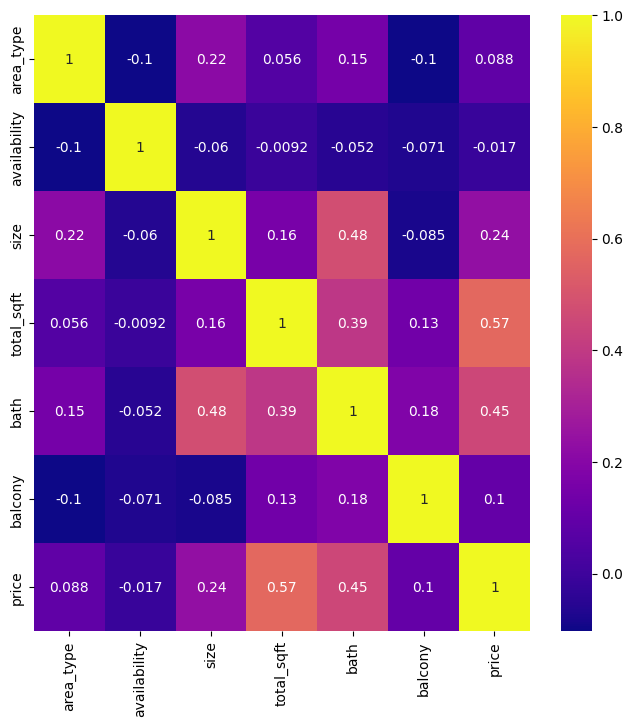

In [84]:
#NOw check the correlation
corr = df.corr()

plt.figure(figsize=(8,8))
sns.heatmap(corr,annot=True,cbar=True,cmap='plasma')
plt.show()

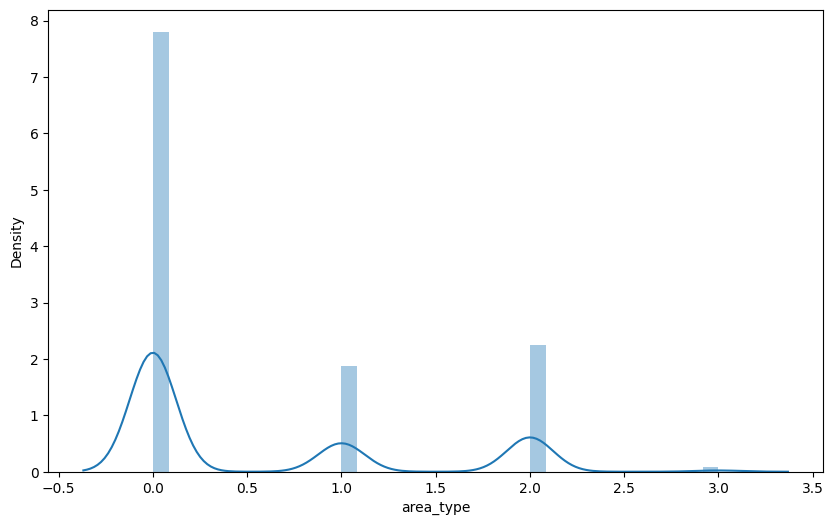

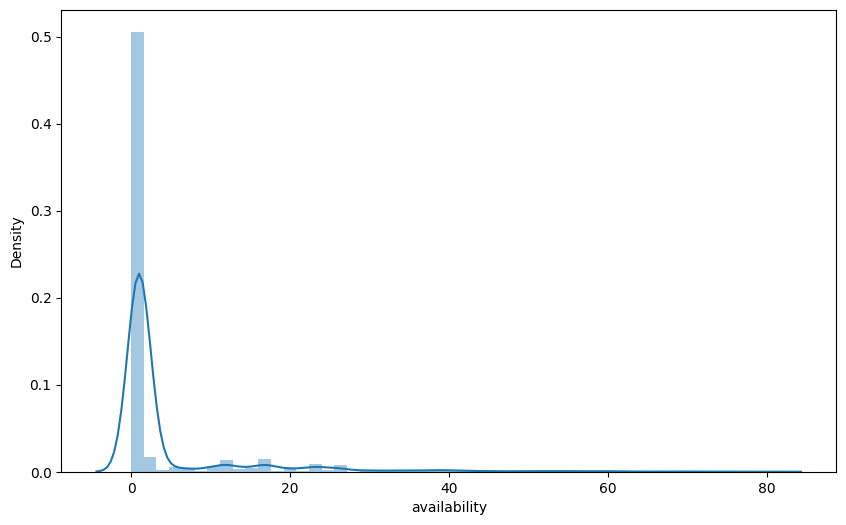

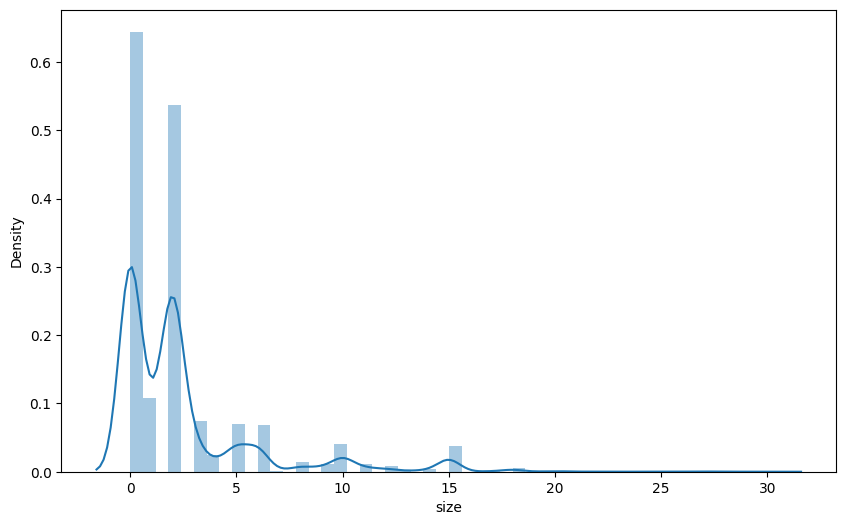

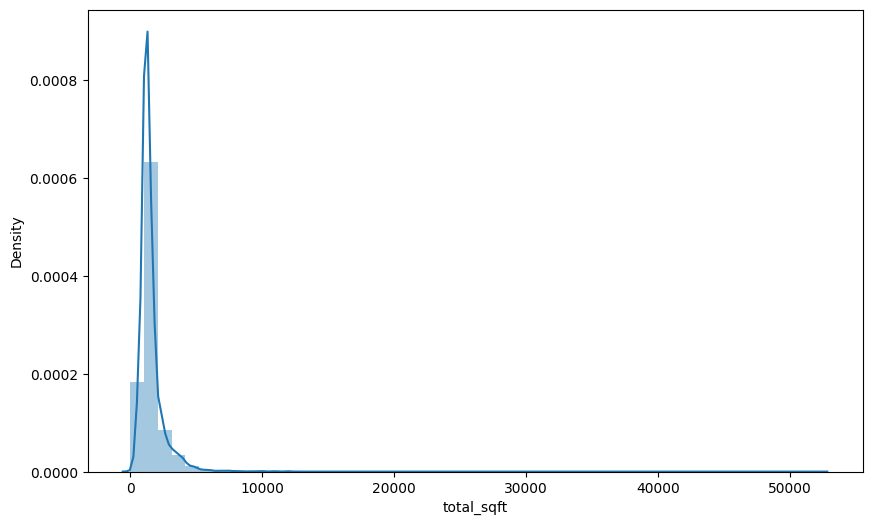

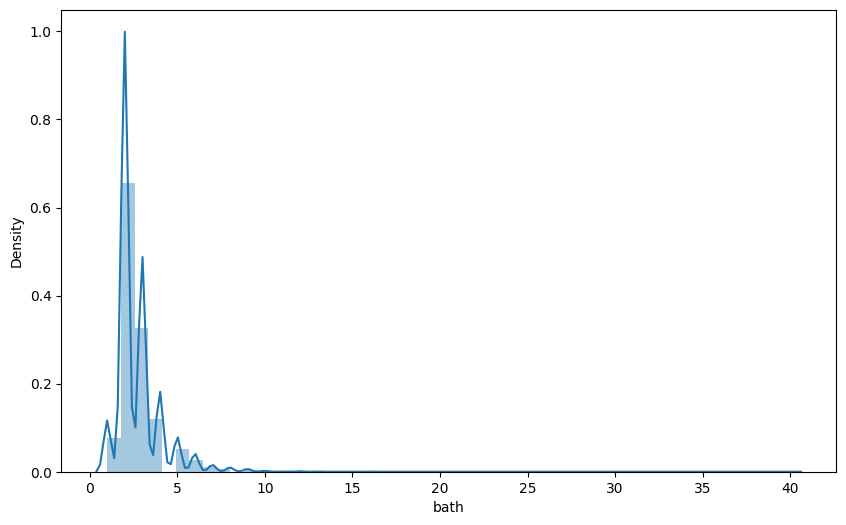

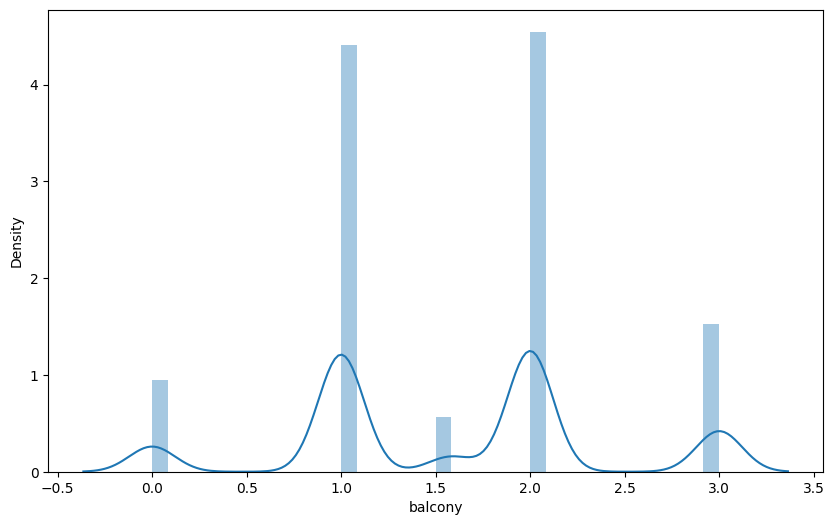

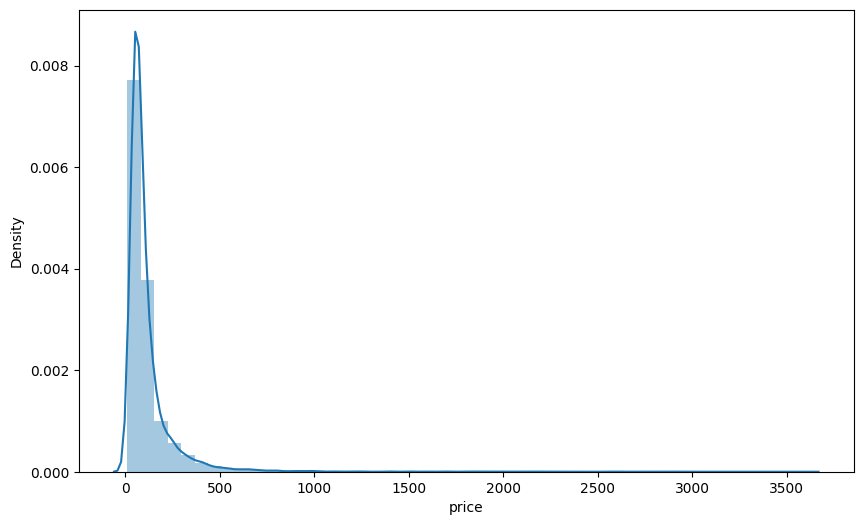

In [85]:
#check dist of all columns
for col in df.columns:
  plt.figure(figsize=(10,6))
  sns.distplot(df[col])
  plt.show()


## SO THE DATA IS RIGHT SKEWED.

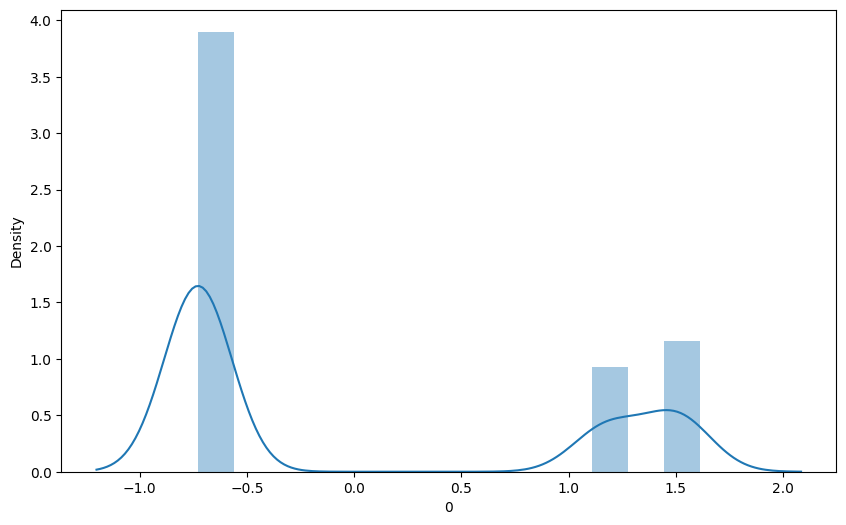

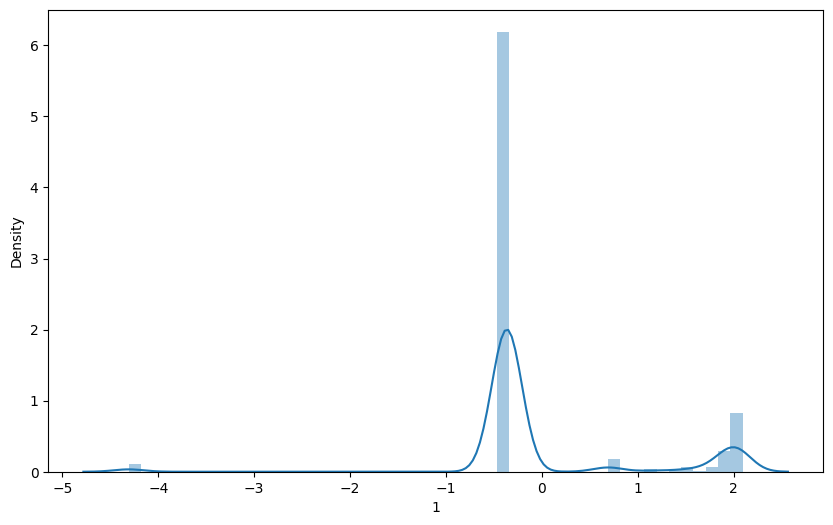

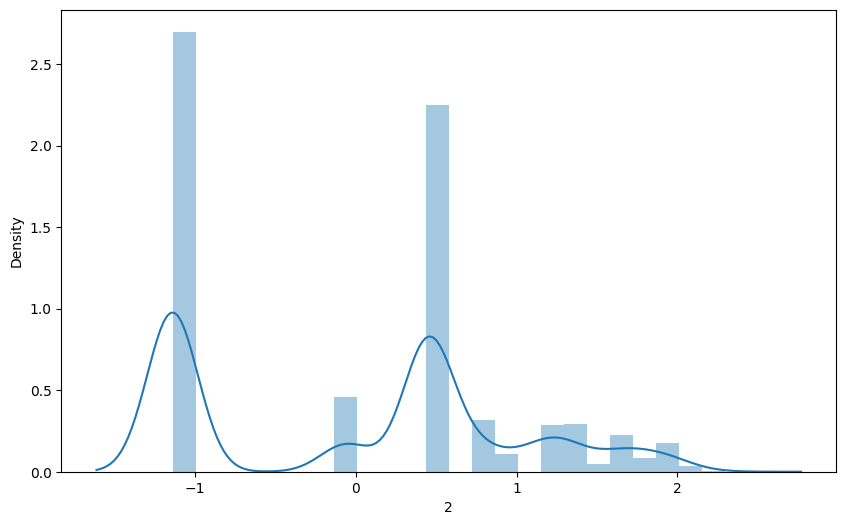

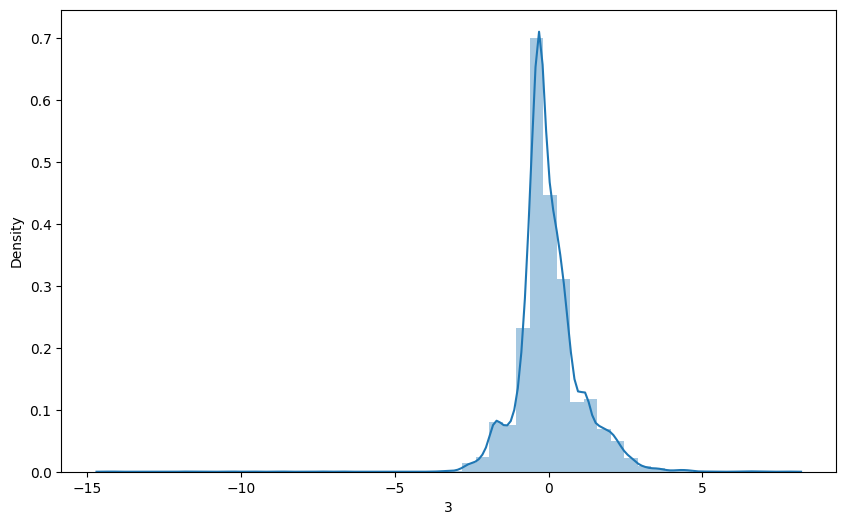

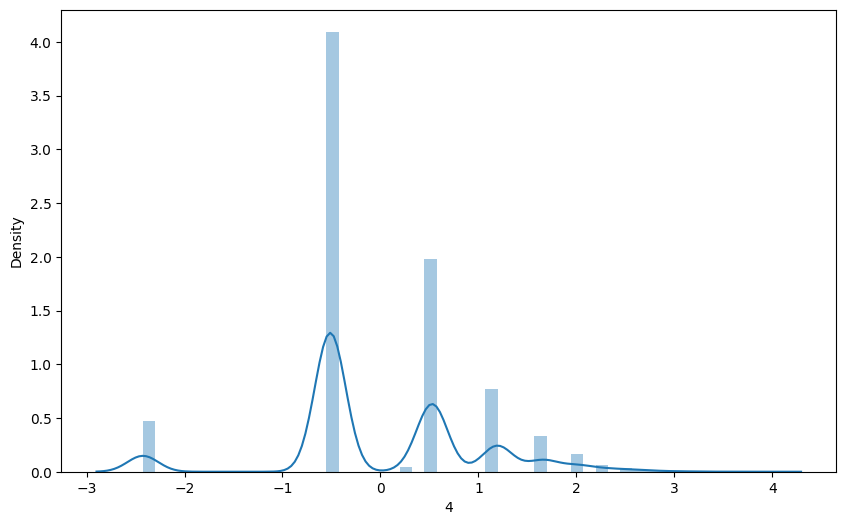

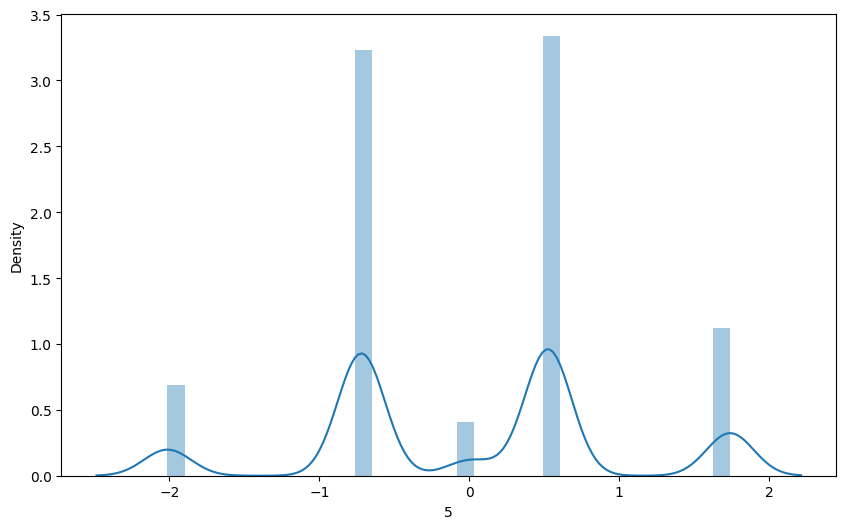

In [116]:
#Splitting the data
x = df.drop(['price'],axis=1)
y = df['price']

#train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
#Applying it onto the data
x_train_transformed = pt.fit_transform(x_train)
x_test_transformed = pt.transform(x_test)
# Convert to DataFrame
df_transformed = pd.DataFrame(x_train_transformed)
#check dist of all columns
for col in df_transformed.columns:
  plt.figure(figsize=(10,6))
  sns.distplot(df_transformed[col])
  plt.show()

#For side by side comparison



In [118]:


#feature scaling
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_train_scaled = ss.fit_transform(x_train_transformed)
x_test_scaled = ss.transform(x_test_transformed)

#model selection
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from catboost import CatBoostRegressor
import lightgbm as lgbm
from sklearn.gaussian_process import GaussianProcessRegressor


lr = LinearRegression()
r = Ridge()
l = Lasso()
en = ElasticNet()
rf = RandomForestRegressor()
gb = GradientBoostingRegressor()
adb = AdaBoostRegressor()
xgb = XGBRegressor()
knn = KNeighborsRegressor()
svr = SVR()
cat = CatBoostRegressor()
lgb =lgbm.LGBMRegressor()
gpr = GaussianProcessRegressor()

#Fittings
lr.fit(x_train_scaled,y_train)

LinearRegression()

In [119]:
r.fit(x_train_scaled,y_train)
l.fit(x_train_scaled,y_train)

Lasso()

In [120]:
en.fit(x_train_scaled,y_train)
rf.fit(x_train_scaled,y_train)

RandomForestRegressor()

In [121]:
gb.fit(x_train_scaled,y_train)
adb.fit(x_train_scaled,y_train)

AdaBoostRegressor()

In [122]:
xgb.fit(x_train_scaled,y_train)
knn.fit(x_train_scaled,y_train)

KNeighborsRegressor()

In [ ]:
svr.fit(x_train_scaled,y_train)
cat.fit(x_train_scaled,y_train)

In [124]:
lgb.fit(x_train_scaled,y_train)
gpr.fit(x_train_scaled,y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001277 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 371
[LightGBM] [Info] Number of data points in the train set: 10232, number of used features: 6
[LightGBM] [Info] Start training from score 114.296633


GaussianProcessRegressor()

In [125]:
#preds
lrpred = lr.predict(x_test_scaled)
rpred = r.predict(x_test_scaled)
lpred = l.predict(x_test_scaled)
enpred = en.predict(x_test_scaled)
rfpred = rf.predict(x_test_scaled)
gbpred = gb.predict(x_test_scaled)
adbpred = adb.predict(x_test_scaled)
xgbpred = xgb.predict(x_test_scaled)
knnpred = knn.predict(x_test_scaled)
svrpred = svr.predict(x_test_scaled)
catpred = cat.predict(x_test_scaled)
lgbpred = lgb.predict(x_test_scaled)
gprpred = gpr.predict(x_test_scaled)

#Evaluations
from sklearn.metrics import r2_score,mean_absolute_error
lrr2 = r2_score(y_test,lrpred)
rr2 = r2_score(y_test,rpred)
lr2 = r2_score(y_test,lpred)
enr2 = r2_score(y_test,enpred)
rfr2 = r2_score(y_test,rfpred)
gbr2 = r2_score(y_test,gbpred)
adbr2 = r2_score(y_test,adbpred)
xgbr2 = r2_score(y_test,xgbpred)
knnr2 = r2_score(y_test,knnpred)
svrr2 = r2_score(y_test,svrpred)
catr2 = r2_score(y_test,catpred)
lgbr2 = r2_score(y_test,lgbpred)
gprr2 = r2_score(y_test,gprpred)

print('LINEAR REG ',lrr2)
print('RIDGE ',rr2)
print('LASSO ',lr2)
print('ELASTICNET',enr2)
print('RANDOM FOREST ',rfr2)
print('GB',gbr2)
print('ADABOOST',adbr2)
print('XGB',xgbr2)
print('KNN',knnr2)
print('SVR',svrr2)
print('CAT',catr2)
print('LIGHTGBM',lgbr2)
print('GUASSIAN PROCESS',gprr2)

LINEAR REG  0.40466216654393894
RIDGE  0.4046594731595662
LASSO  0.4042607553276655
ELASTICNET 0.3682240414156991
RANDOM FOREST  0.4848310994255871
GB 0.5280711820313397
ADABOOST 0.36595112886199577
XGB 0.4418255166469691
KNN 0.5291856275885345
SVR 0.28423245898442207
CAT 0.4779351162421174
LIGHTGBM 0.4896789387600857
GUASSIAN PROCESS -57797.00414094806


## According to the above normal configuration, the R2 score is very low. Now we can transform the data, remove outliers, remove irrelevant columns and perform some hyperparameter tuning to improve the r2 score.

## Scores 1st timeare below 
LINEAR REG  0.2968792590185686

RIDGE  0.2969044351383807

LASSO  0.29971674605251963

ELASTICNET 0.3384510780359393

RANDOM FOREST  0.4672344682606251

GB 0.5341439357306617

ADABOOST 0.4721148044708682

XGB 0.4418255166469691

KNN 0.5384610597969082

SVR 0.2564226394062812

CAT 0.4780657622927311

LIGHTGBM 0.458766259021691

GUASSIAN PROCESS -75540.82582203508

## Now we apply the Yeo-Johnson Power Transformation on the processed clean data, we get these results which is an improvement

LINEAR REG  0.40466216654393894

RIDGE  0.4046594731595662

LASSO  0.4042607553276655

ELASTICNET 0.3682240414156991

RANDOM FOREST  0.4848310994255871

GB 0.5280711820313397

ADABOOST 0.36595112886199577

XGB 0.4418255166469691

KNN 0.5291856275885345

SVR 0.28423245898442207

CAT 0.4779351162421174

LIGHTGBM 0.4896789387600857

GUASSIAN PROCESS -57797.00414094806